In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


llms = [ 
    "qwen2.5",  
]


examples = {
    "FIC" : "join_examples_dict_1", 
    "CIC" : 'join_examples_dict_2',
    "FSC" : 'vector_based_examples_dict_1',
    "CSC" : 'vector_based_examples_dict_2',
}

model_types = ['TF', 'FT', 'UN', 'IN']


def extract_model_type(model, suffix=""): 
    flag = True
    for ll in llms:
        if ll in model:
            flag = False
    if flag: 
        return "P1"
    elif ' U ' in model: 
        return f"UN{suffix}"
    elif ' ∩ ' in model: 
        return f"IN{suffix}"
    elif '-tf-p2' in model: 
        return "TF"
    elif '-ft-p2' in model: 
        return "FT"
    elif '-z-p2' in model: 
        return "ZS" 
    else: 
        return "P1"


def df_plot_show(groups): 
    prompt_types = list(groups.keys())
    average_f1 = list(groups.values())

    df = pd.DataFrame({"Prompt Types" : prompt_types, "Average F1" : average_f1})

    display(df.style.hide())

    # Create the bar plot
    plt.figure(figsize=(14, 6))
    bars = plt.bar(prompt_types, average_f1, alpha=0.8, edgecolor='navy', linewidth=1.2)

    # Customize the plot
    plt.title('F1 Score Averages by Prompt Type', fontsize=16, fontweight='bold')
    plt.xlabel('Prompt Types', fontsize=12)
    plt.ylabel('Average F1 Score', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()
    
def df_plot_show_runtime(groups): 
    prompt_types = list(groups.keys())
    average_runtime = list(groups.values())

    average_runtime_to_mmss = []
    for avg in average_runtime: 
        mm = int(avg // 60)
        ss = int(avg % 60)
        average_runtime_to_mmss.append(f"{mm:02d}:{ss:02d}")
        
    df = pd.DataFrame({"Prompt Types" : prompt_types, "Average Runtime (mm:ss)" : average_runtime_to_mmss})

    display(df.style.hide())

    # Create the bar plot
    plt.figure(figsize=(14, 6))
    bars = plt.bar(prompt_types, average_runtime, alpha=0.8, edgecolor='navy', linewidth=1.2)

    # Customize the plot
    
    # Step 4: Format y-axis ticks back to mm:ss
    def format_mmss(x, pos):
        mm = int(x // 60)
        ss = int(x % 60)
        return f"{mm:02d}:{ss:02d}"

    from matplotlib.ticker import FuncFormatter
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_mmss))    
    
    plt.title('Average Runtime by Prompt Type', fontsize=16, fontweight='bold')
    plt.xlabel('Prompt Types', fontsize=12)
    plt.ylabel('Average Runtime (mm:ss)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        mm = int(height // 60)
        ss = int(height % 60)
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f"{mm:02d}:{ss:02d}", ha='center', va='bottom', fontweight='bold')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()
    




In [24]:
def results_extraction_main(candidate_pairs, suffix, weight = None): 
    datasets = ['D2', 'D5', 'D6', 'D7', 'D8']
    for dataset in datasets:
        
        print(f"Datset {dataset} table & figure")
        
        results = f'../results/{candidate_pairs}/{dataset}{suffix}.csv'
        results_ui = f'../results/{candidate_pairs}/{dataset}_ui.csv'
        
        results_ui = pd.read_csv(results_ui)
        results = pd.read_csv(results)
    
        cols = ["precision","recall","f1"]
        if suffix == '':
            for col in cols:
                results[col] = results[col] * 100
            
        for col in cols: 
            results_ui[col] = results_ui[col] * 100
    
        results_ui['model_type'] = results_ui['model'].apply(lambda x: extract_model_type(x, ""))
        results['model_type'] = results['model'].apply(lambda x: extract_model_type(x, ''))
        if weight: 
            results = results[results['weights_extracted_from'] == weight]
            results_ui = results_ui[results_ui['weights_extracted_from'] == weight]
        
        if candidate_pairs != 'original':
            results = results[(results['model_type'] != 'P1') & (results['model_type'] != 'UN') & (results['model_type'] != 'IN')]
            results_ui = results_ui[(results_ui['model_type'] != 'P1')]
            results = pd.concat([results,results_ui])
        else:         
            results = results[(results['model_type'] != 'P1')] 
            

        groupby = results.groupby(by=['model_type', 'examples'])

        

        groups = {"ZS" : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()}    


        for model in model_types: 
            for key in examples: 
                groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()


        # groups
        df_plot_show(groups)


# KNN-Join Only Matching Results 

Datset D2 table & figure


Prompt Types,Average F1
ZS,87.063655
FIC-TF,87.703252
CIC-TF,87.611497
FSC-TF,87.468290
CSC-TF,86.992288
FIC-FT,87.377640
CIC-FT,88.389121
FSC-FT,87.166056
CSC-FT,86.500255
FIC-UN,50.067476


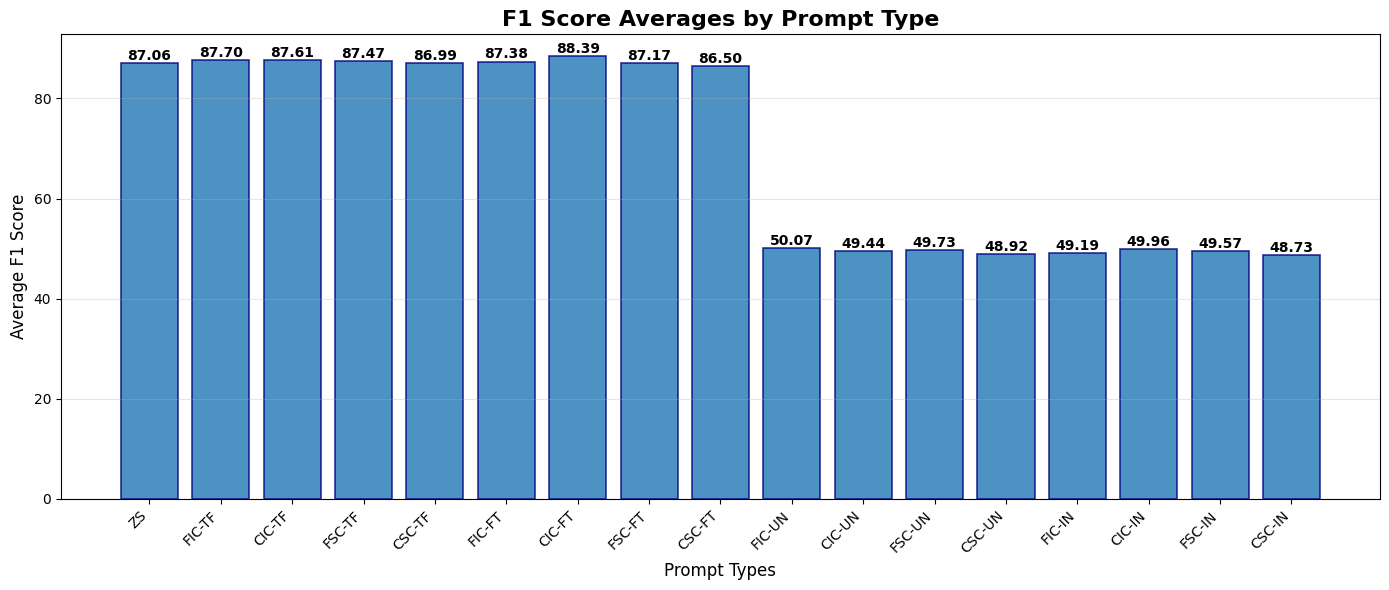

Datset D5 table & figure


Prompt Types,Average F1
ZS,81.604140
FIC-TF,74.487472
CIC-TF,86.502319
FSC-TF,88.165823
CSC-TF,87.674590
FIC-FT,73.114565
CIC-FT,86.061508
FSC-FT,88.094072
CSC-FT,87.901235
FIC-UN,24.149828


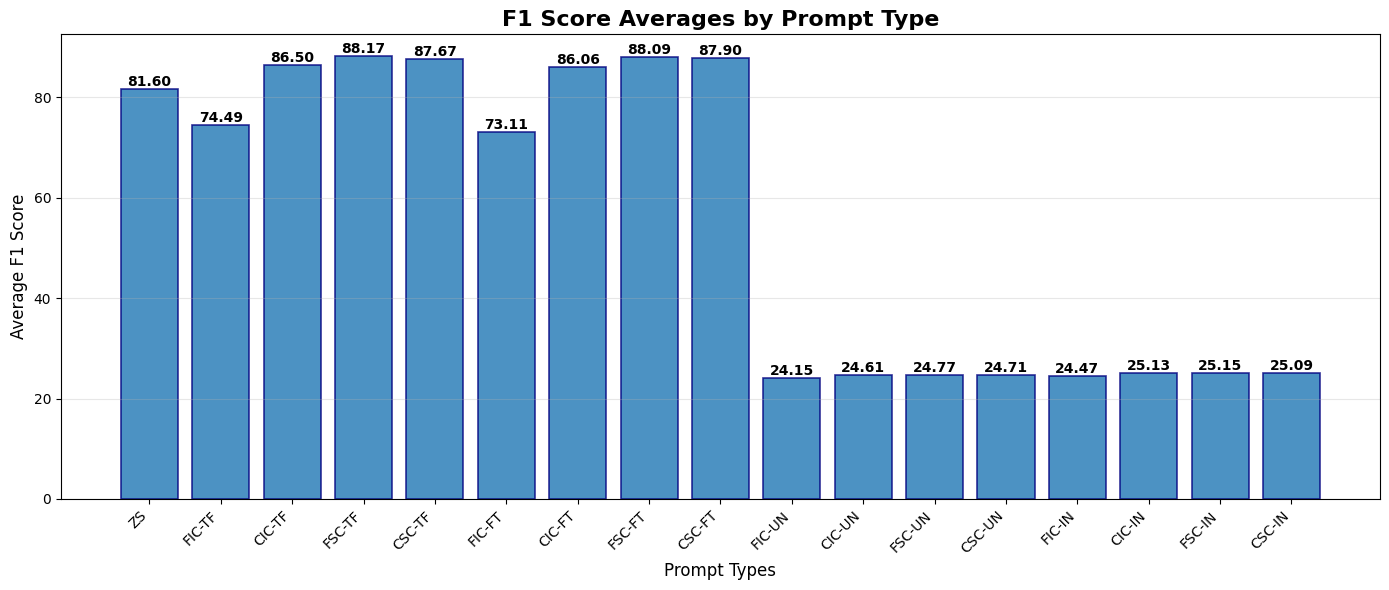

Datset D6 table & figure


Prompt Types,Average F1
ZS,67.664173
FIC-TF,67.123875
CIC-TF,65.069686
FSC-TF,60.054595
CSC-TF,59.686394
FIC-FT,65.306122
CIC-FT,66.980728
FSC-FT,62.546468
CSC-FT,61.834320
FIC-UN,0.953678


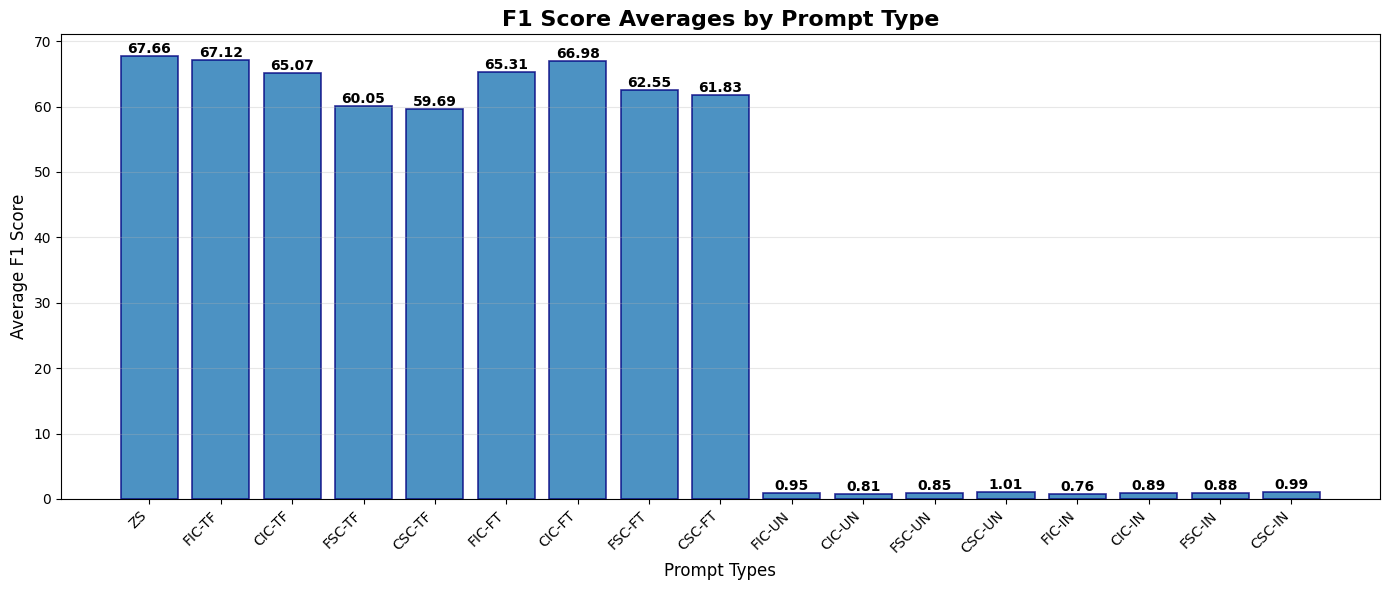

Datset D7 table & figure


Prompt Types,Average F1
ZS,62.326169
FIC-TF,62.954619
CIC-TF,60.513447
FSC-TF,60.834868
CSC-TF,61.700807
FIC-FT,62.587191
CIC-FT,61.324257
FSC-FT,62.401513
CSC-FT,62.163852
FIC-UN,0.273349


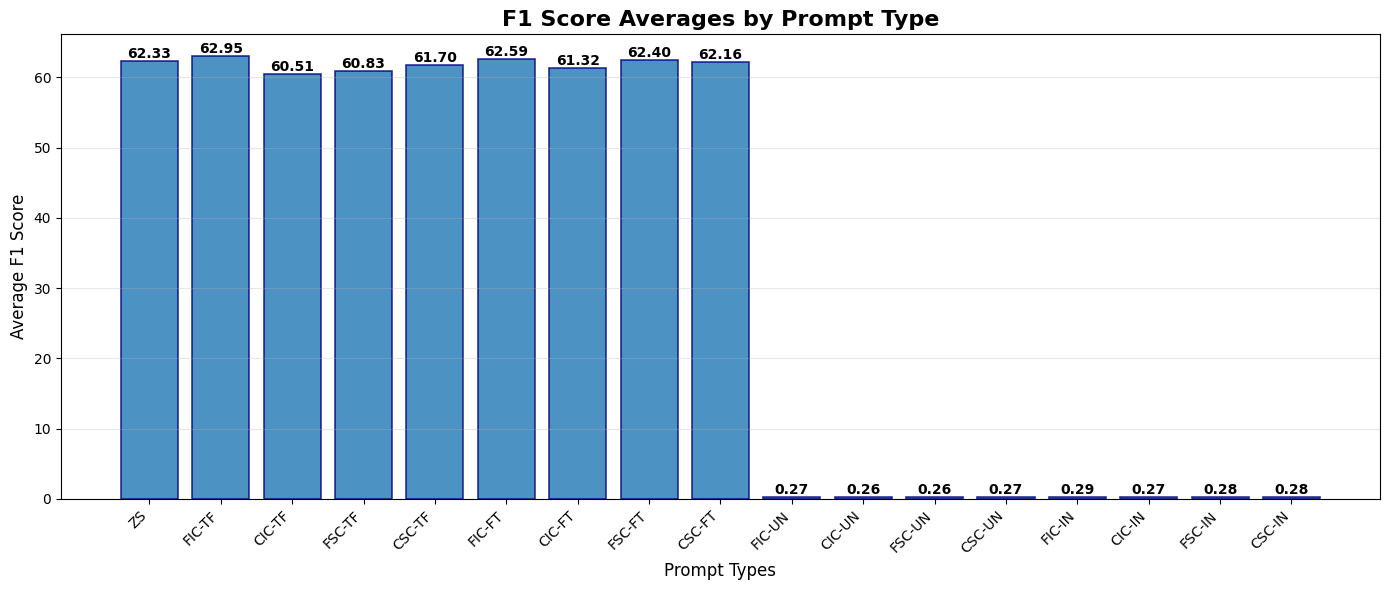

Datset D8 table & figure


Prompt Types,Average F1
ZS,53.328051
FIC-TF,61.310378
CIC-TF,60.303030
FSC-TF,61.960386
CSC-TF,61.665900
FIC-FT,61.664841
CIC-FT,59.324387
FSC-FT,60.900000
CSC-FT,62.035697
FIC-UN,24.277457


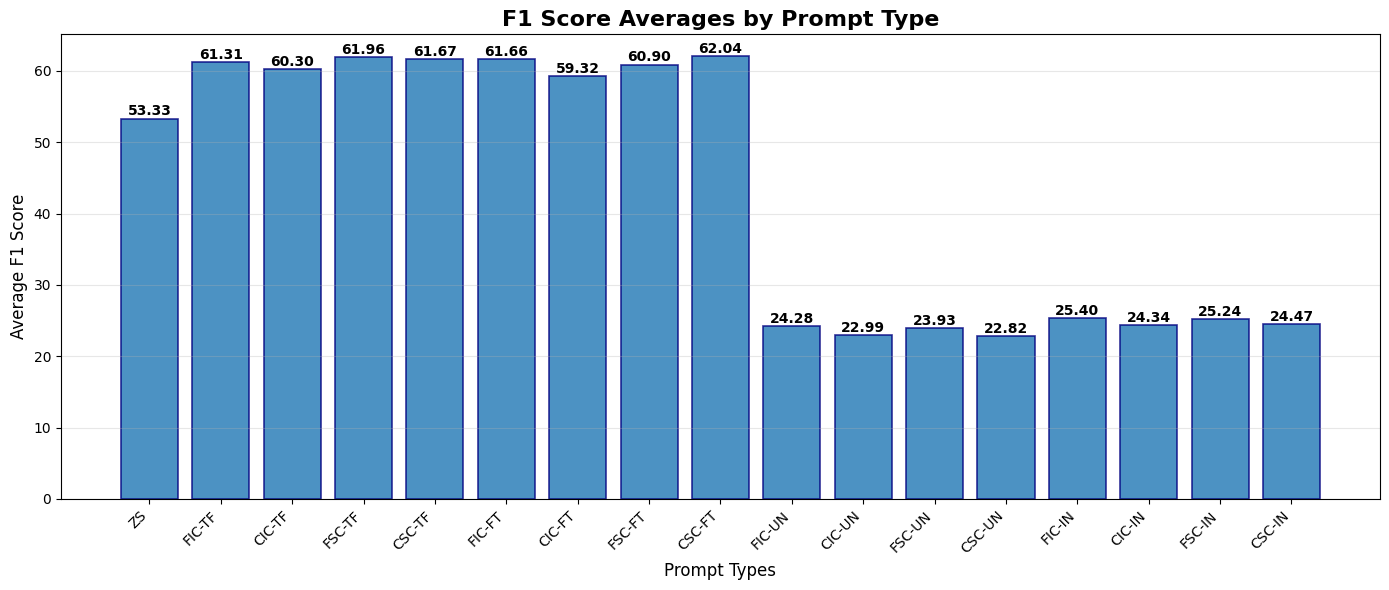

In [25]:

candidate_pairs = 'original'
results_extraction_main(candidate_pairs, '')


# Clustering with KNN-Join and weights of TopKJoin

Datset D2 table & figure


Prompt Types,Average F1
ZS,86.361243
FIC-TF,87.133891
CIC-TF,88.360062
FSC-TF,87.343096
CSC-TF,86.332454
FIC-FT,86.466561
CIC-FT,86.332454
FSC-FT,85.608072
CSC-FT,86.571880
FIC-UN,87.441376


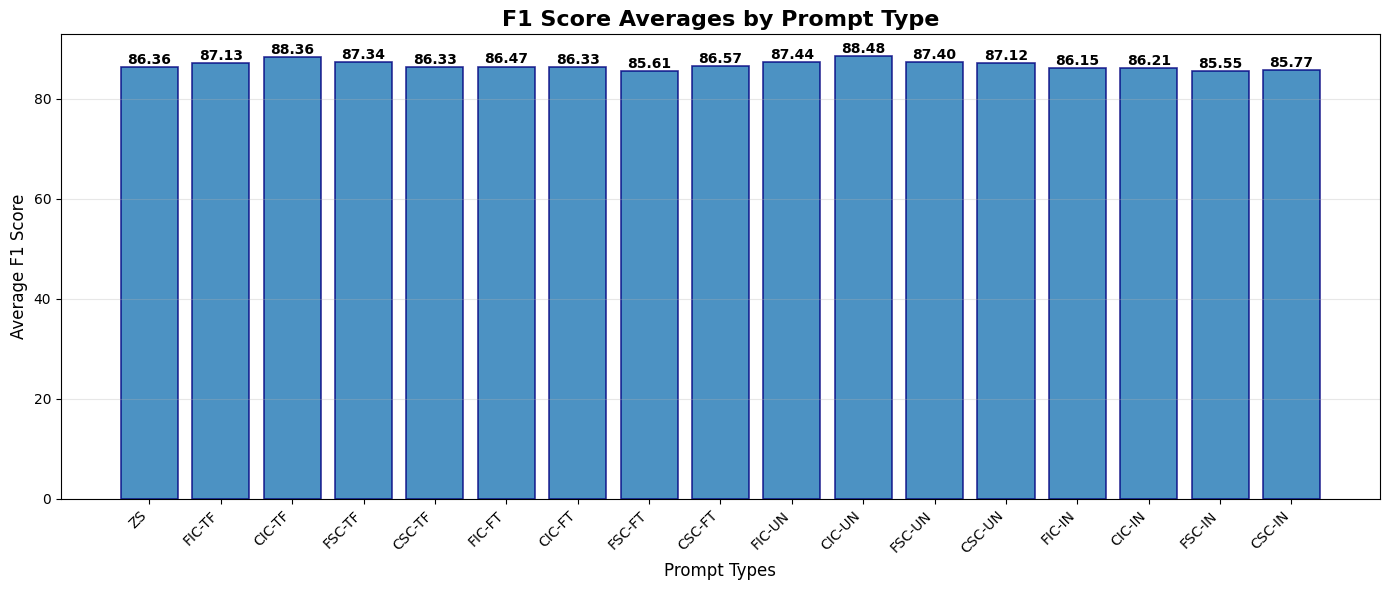

Datset D5 table & figure


Prompt Types,Average F1
ZS,81.365802
FIC-TF,73.224044
CIC-TF,86.773547
FSC-TF,88.078818
CSC-TF,87.290886
FIC-FT,71.677307
CIC-FT,85.917280
FSC-FT,87.521793
CSC-FT,87.283672
FIC-UN,74.625177


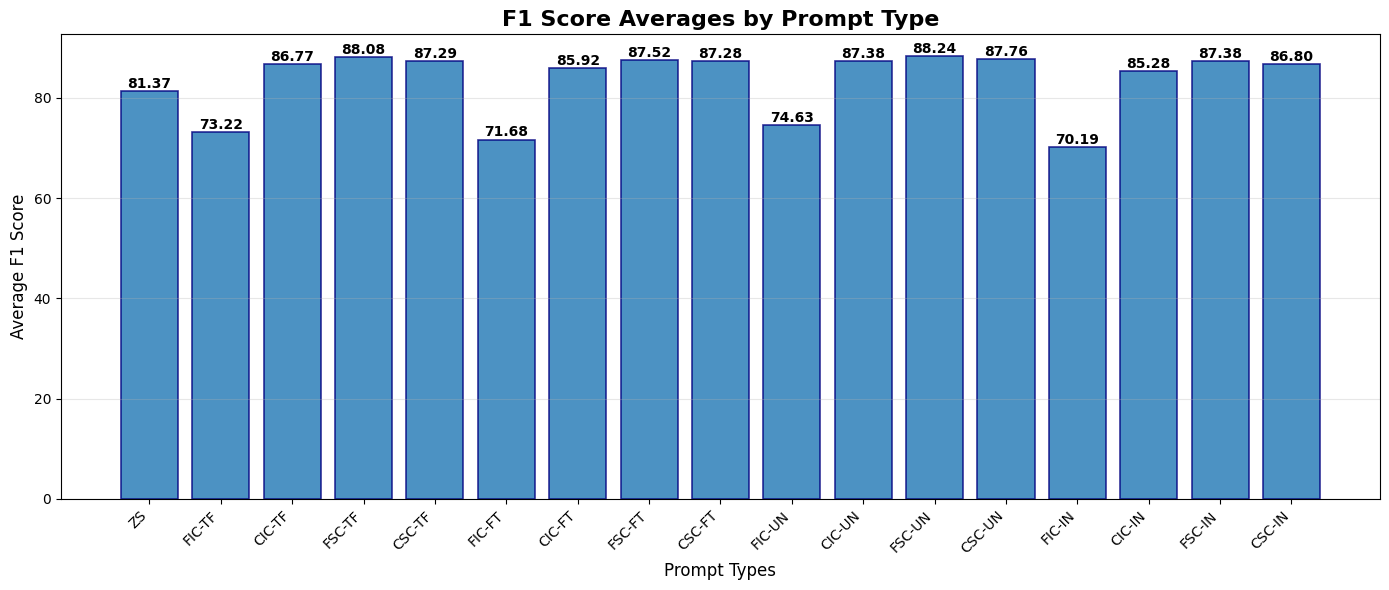

Datset D6 table & figure


Prompt Types,Average F1
ZS,75.482625
FIC-TF,74.066798
CIC-TF,71.535768
FSC-TF,66.701847
CSC-TF,63.436620
FIC-FT,71.068548
CIC-FT,73.725490
FSC-FT,68.073879
CSC-FT,66.117518
FIC-UN,74.890724


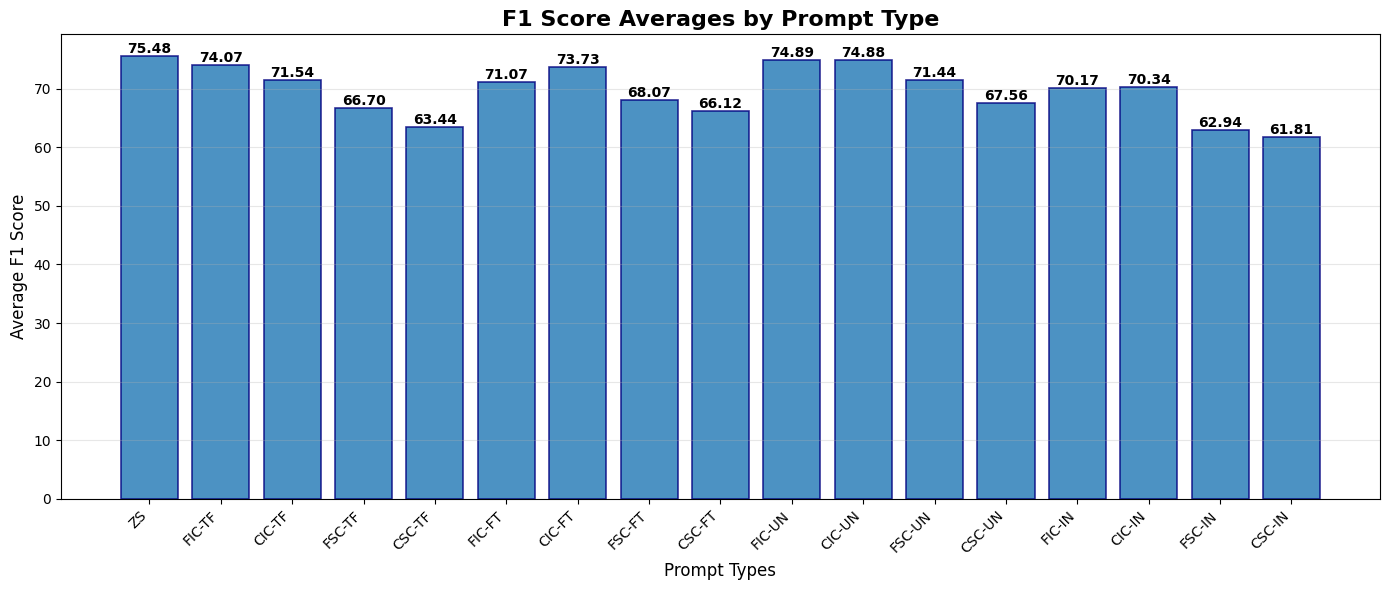

Datset D7 table & figure


Prompt Types,Average F1
ZS,69.318182
FIC-TF,69.512195
CIC-TF,68.701754
FSC-TF,68.796069
CSC-TF,69.176636
FIC-FT,69.540435
CIC-FT,69.405099
FSC-FT,69.114013
CSC-FT,69.152304
FIC-UN,69.337114


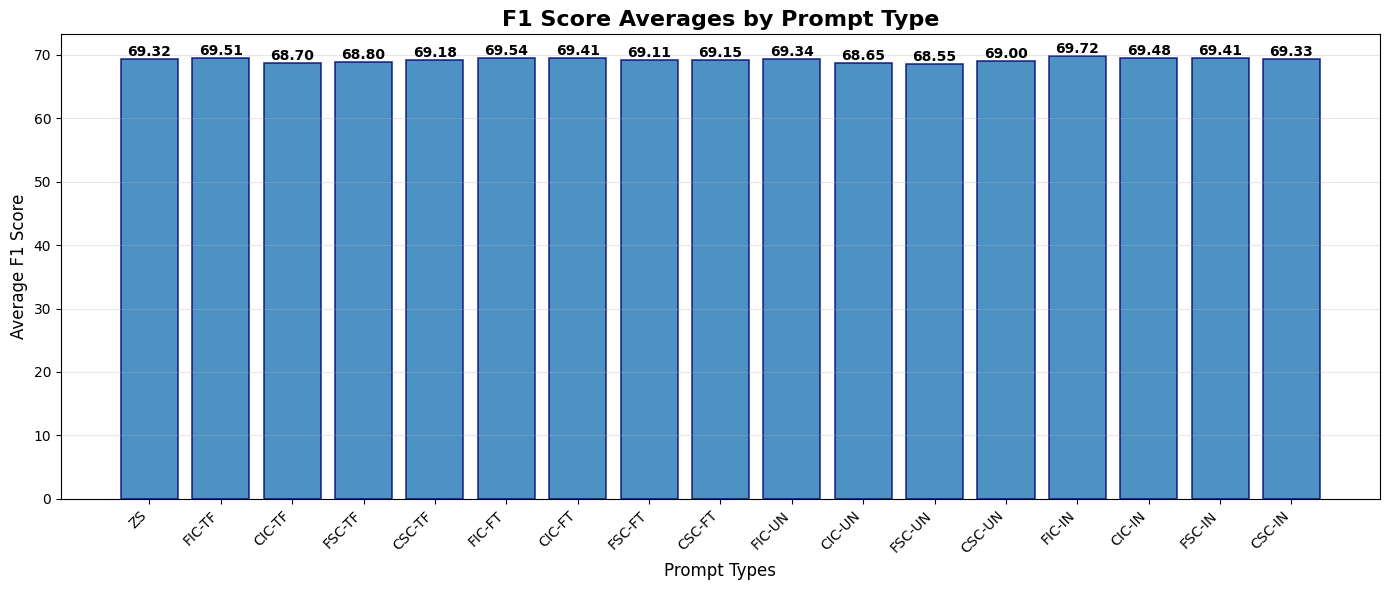

Datset D8 table & figure


Prompt Types,Average F1
ZS,64.496124
FIC-TF,67.796610
CIC-TF,65.925059
FSC-TF,66.471278
CSC-TF,69.315673
FIC-FT,65.311152
CIC-FT,67.040359
FSC-FT,65.118979
CSC-FT,68.400226
FIC-UN,68.130631


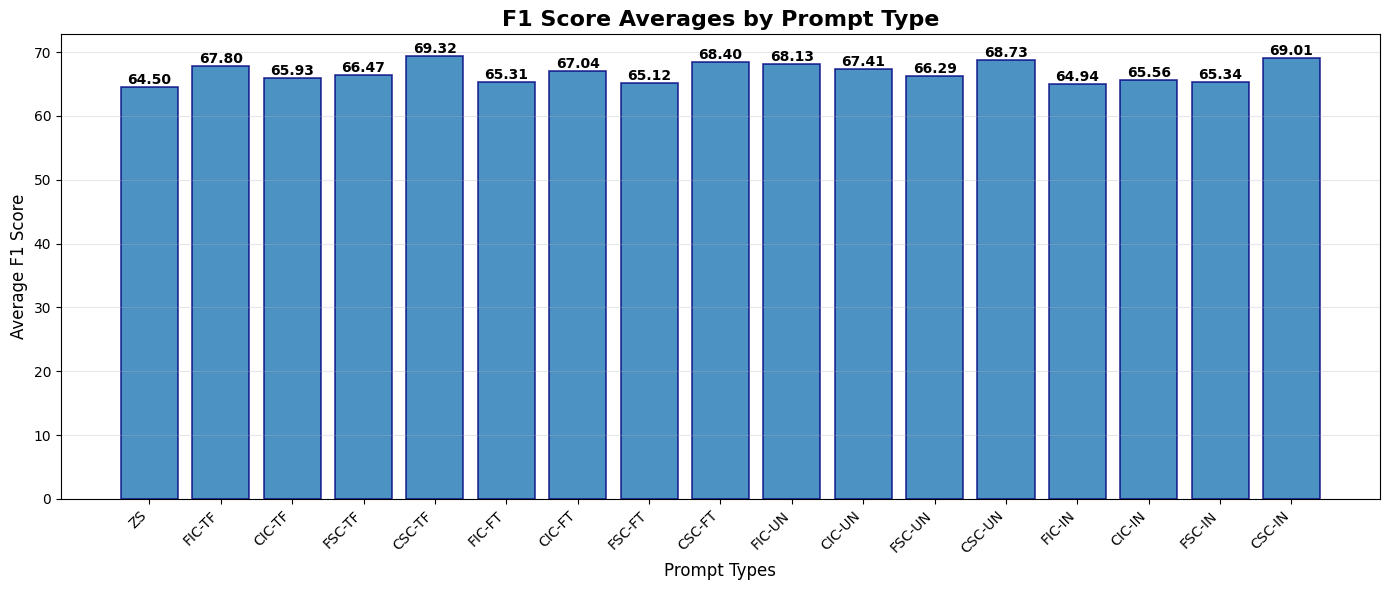

In [26]:
results_extraction_main(candidate_pairs, '_clustering', 'TopKJoin')


# Clustering with KNN-Join and weights of SBERT

Datset D2 table & figure


Prompt Types,Average F1
ZS,85.789198
FIC-TF,86.766995
CIC-TF,88.238315
FSC-TF,86.635465
CSC-TF,86.268344
FIC-FT,86.401674
CIC-FT,86.509186
FSC-FT,85.593668
CSC-FT,86.118387
FIC-UN,87.060041


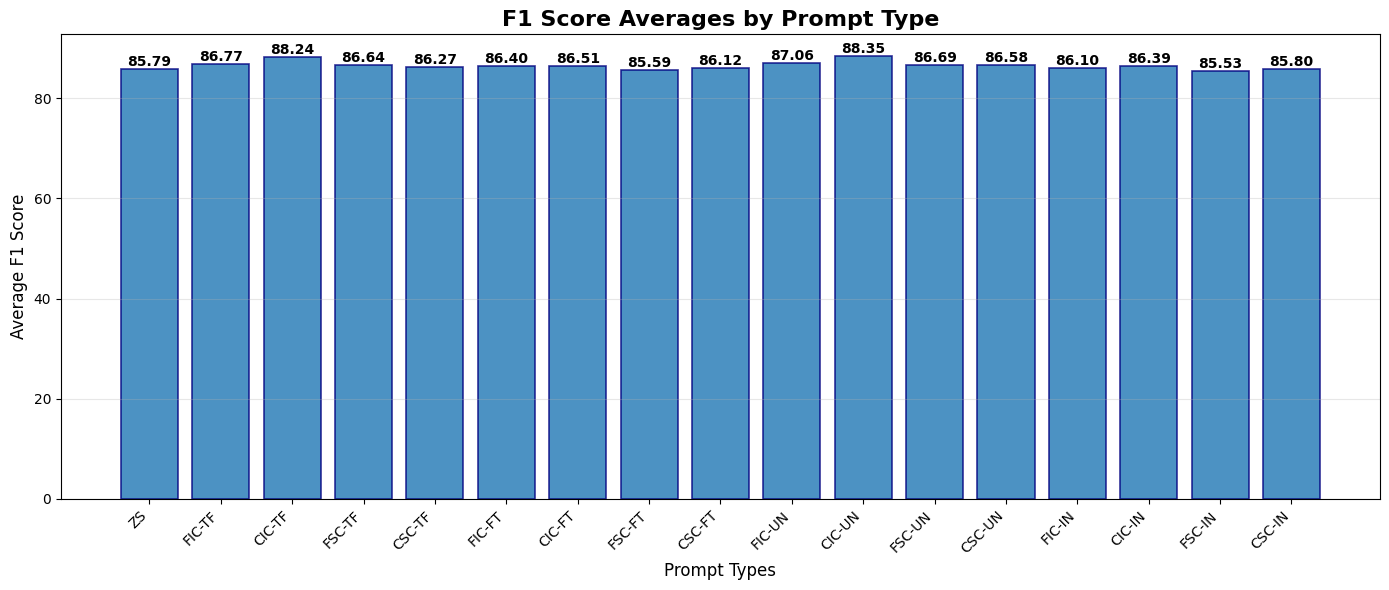

Datset D5 table & figure


Prompt Types,Average F1
ZS,79.755579
FIC-TF,72.742906
CIC-TF,85.470085
FSC-TF,86.510481
CSC-TF,86.172345
FIC-FT,71.171694
CIC-FT,84.826884
FSC-FT,86.355700
CSC-FT,86.066398
FIC-UN,73.913043


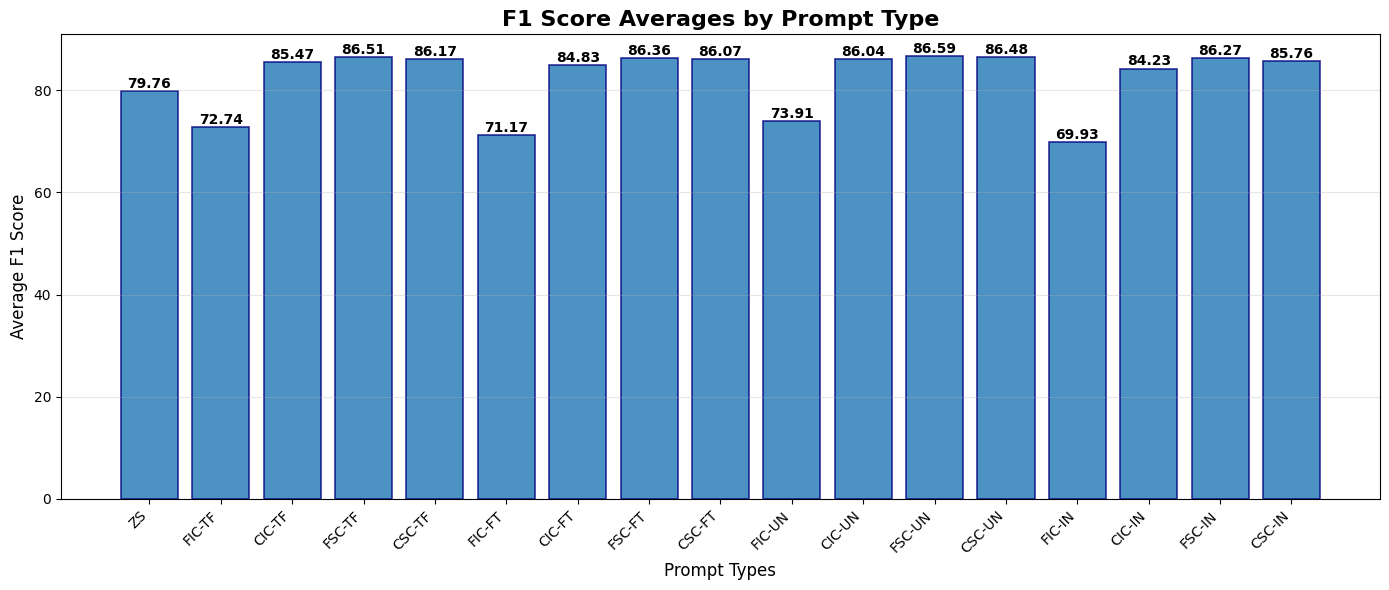

Datset D6 table & figure


Prompt Types,Average F1
ZS,73.562107
FIC-TF,72.369715
CIC-TF,70.210632
FSC-TF,66.456362
CSC-TF,63.151991
FIC-FT,70.060484
CIC-FT,72.164948
FSC-FT,67.440633
CSC-FT,65.935272
FIC-UN,73.275024


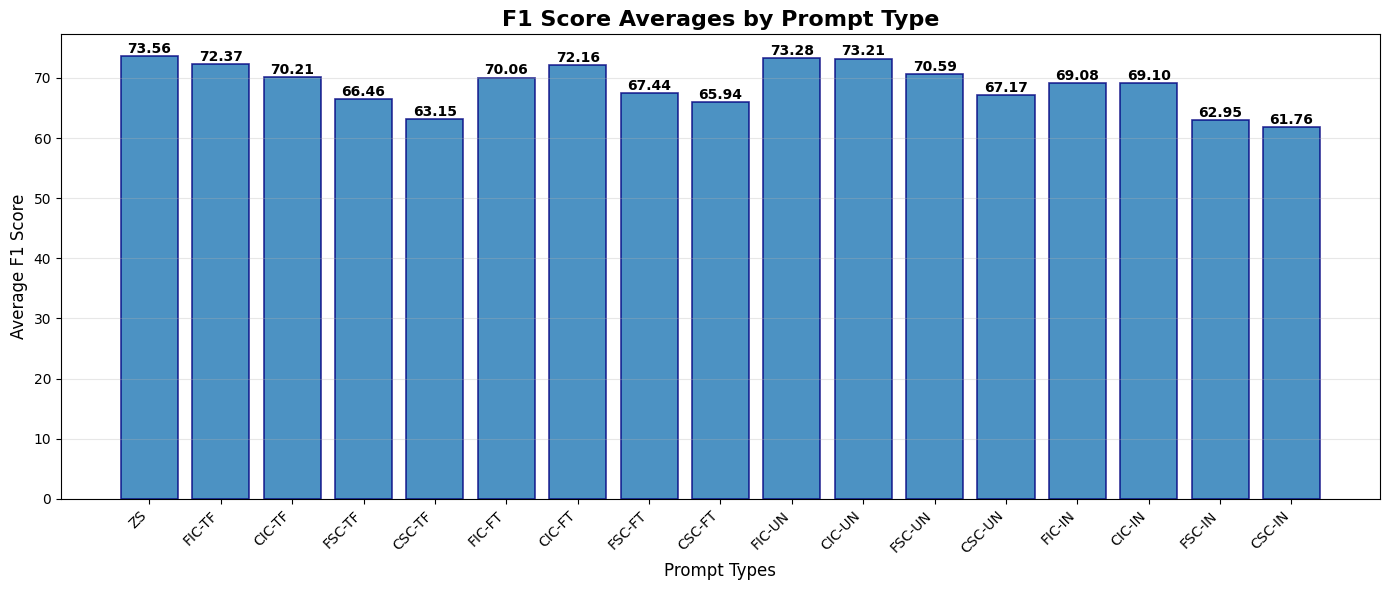

Datset D7 table & figure


Prompt Types,Average F1
ZS,68.498038
FIC-TF,68.561151
CIC-TF,67.816901
FSC-TF,68.271955
CSC-TF,68.079096
FIC-FT,68.938307
CIC-FT,68.540925
FSC-FT,68.419183
CSC-FT,68.151290
FIC-UN,68.687589


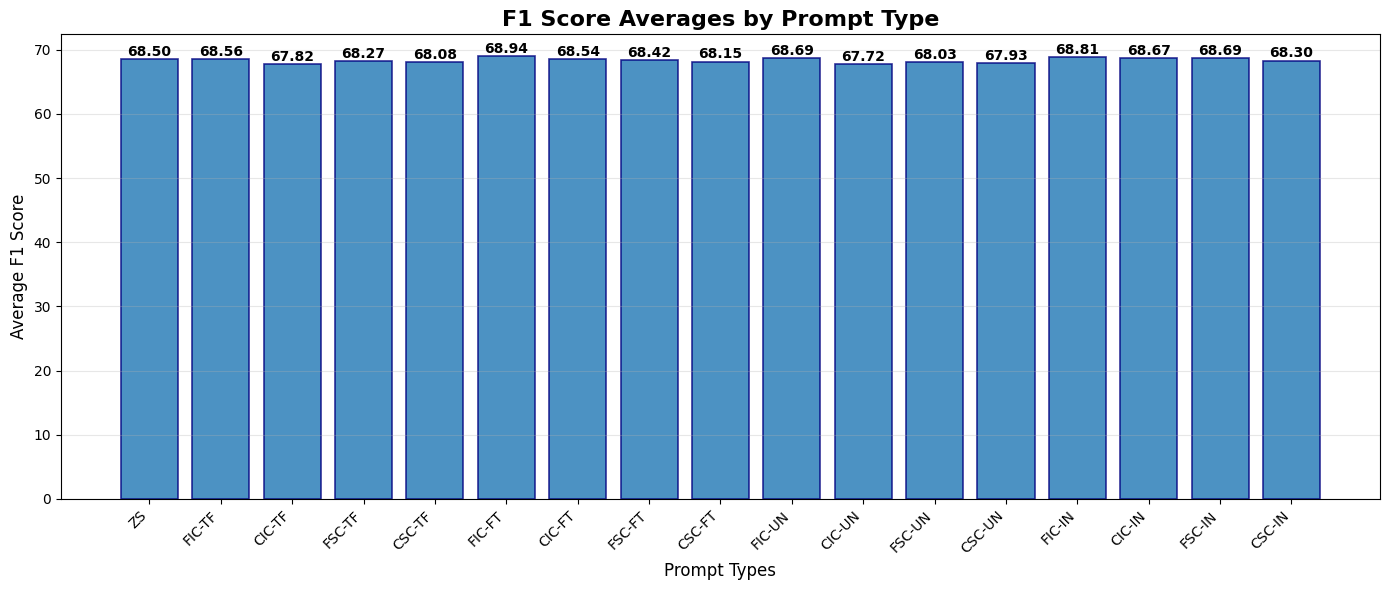

Datset D8 table & figure


Prompt Types,Average F1
ZS,61.591696
FIC-TF,66.521739
CIC-TF,64.443188
FSC-TF,66.139062
CSC-TF,67.089276
FIC-FT,64.681358
CIC-FT,65.771091
FSC-FT,64.656616
CSC-FT,66.848122
FIC-UN,66.991342


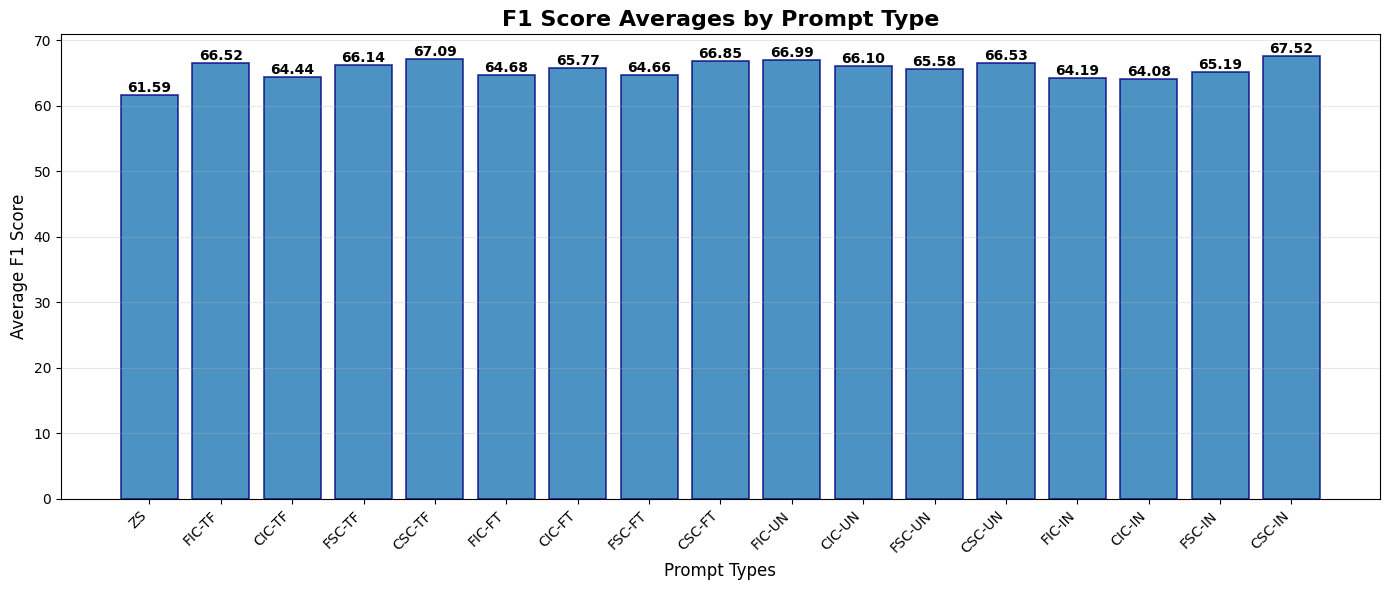

In [27]:
results_extraction_main(candidate_pairs, '_clustering', 'distilroberta')


# Standard Blocking Only Matching Results

Datset D2 table & figure


Prompt Types,Average F1
ZS,88.852814
FIC-TF,90.280066
CIC-TF,90.043764
FSC-TF,89.902280
CSC-TF,88.195233
FIC-FT,89.900111
CIC-FT,89.319314
FSC-FT,88.939052
CSC-FT,88.689810
FIC-UN,91.939004


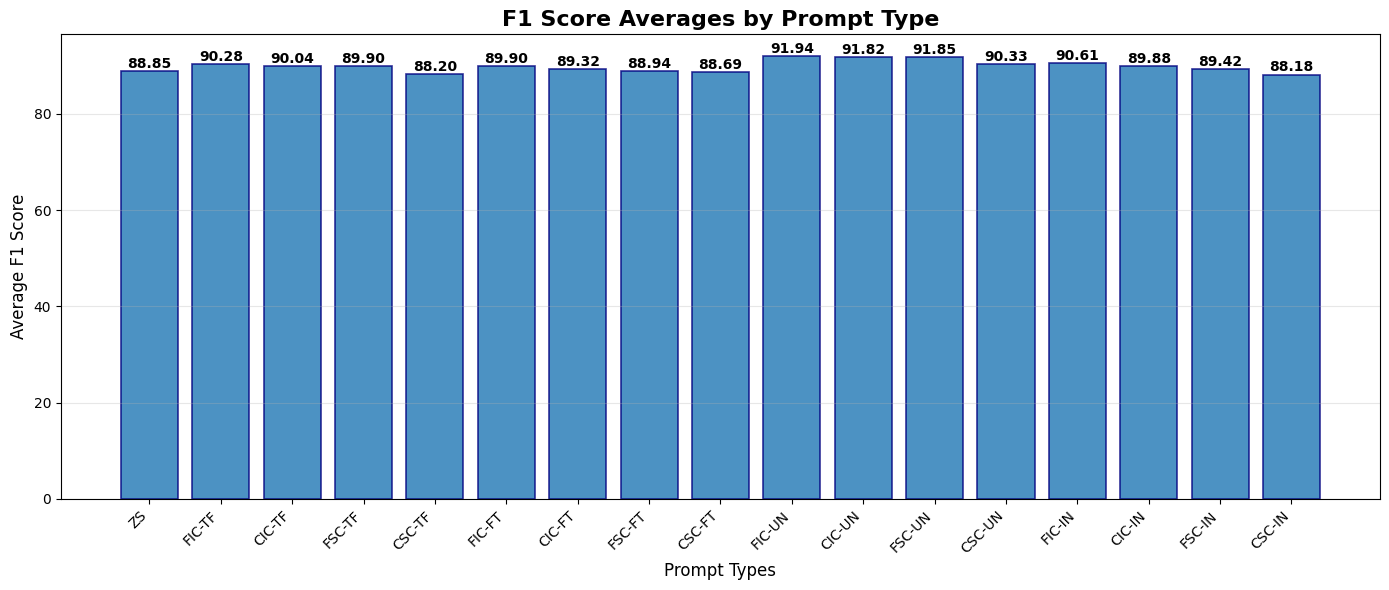

Datset D5 table & figure


Prompt Types,Average F1
ZS,80.339163
FIC-TF,74.059062
CIC-TF,84.083312
FSC-TF,88.010076
CSC-TF,85.544041
FIC-FT,71.372311
CIC-FT,79.249510
FSC-FT,87.548139
CSC-FT,86.632391
FIC-UN,74.982159


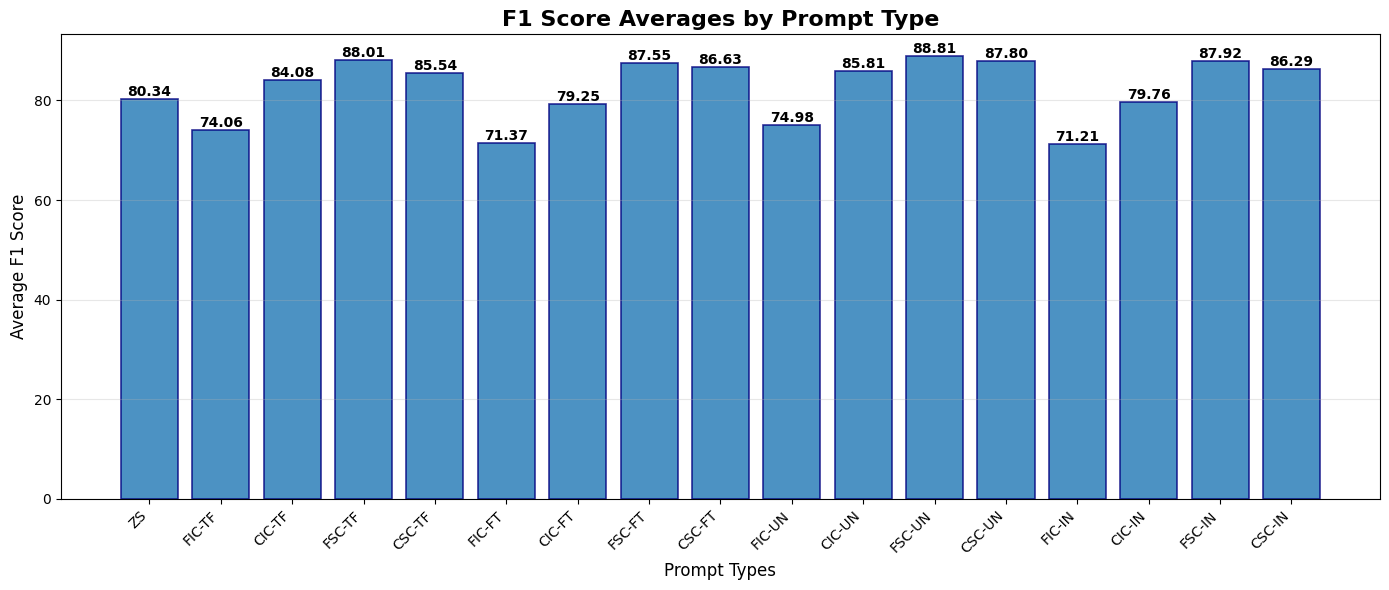

Datset D6 table & figure


Prompt Types,Average F1
ZS,71.396896
FIC-TF,69.791183
CIC-TF,66.373841
FSC-TF,61.349693
CSC-TF,62.898253
FIC-FT,68.893130
CIC-FT,68.443598
FSC-FT,65.603190
CSC-FT,70.028275
FIC-UN,73.329424


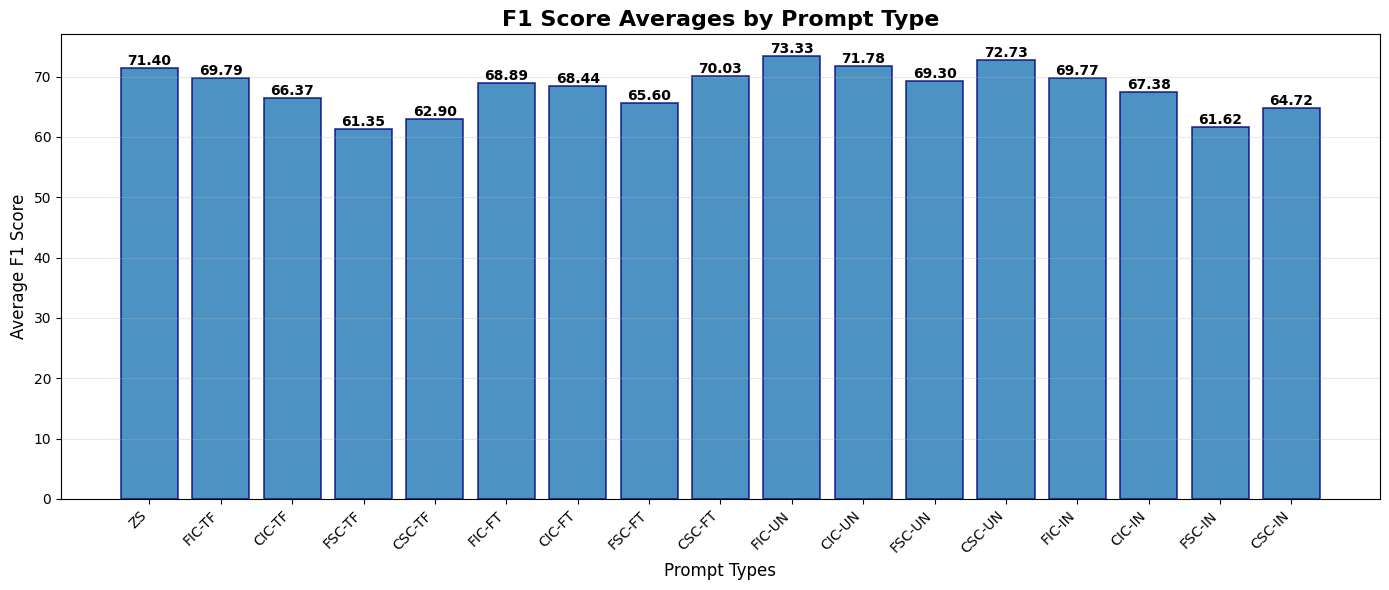

Datset D7 table & figure


Prompt Types,Average F1
ZS,58.204896
FIC-TF,64.131898
CIC-TF,62.605863
FSC-TF,61.181703
CSC-TF,62.825521
FIC-FT,63.534083
CIC-FT,62.909567
FSC-FT,62.120233
CSC-FT,62.512171
FIC-UN,68.430015


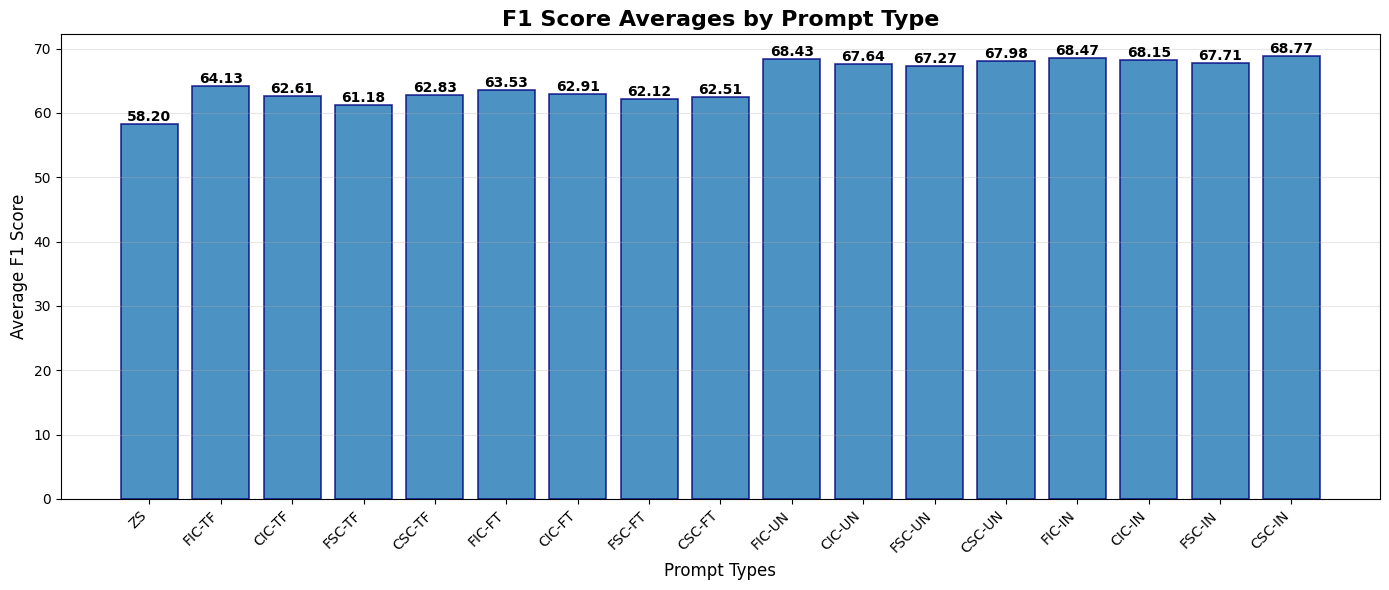

Datset D8 table & figure


Prompt Types,Average F1
ZS,60.796253
FIC-TF,63.995943
CIC-TF,66.666667
FSC-TF,66.516854
CSC-TF,65.604113
FIC-FT,63.417367
CIC-FT,65.639936
FSC-FT,64.672686
CSC-FT,66.810113
FIC-UN,71.274328


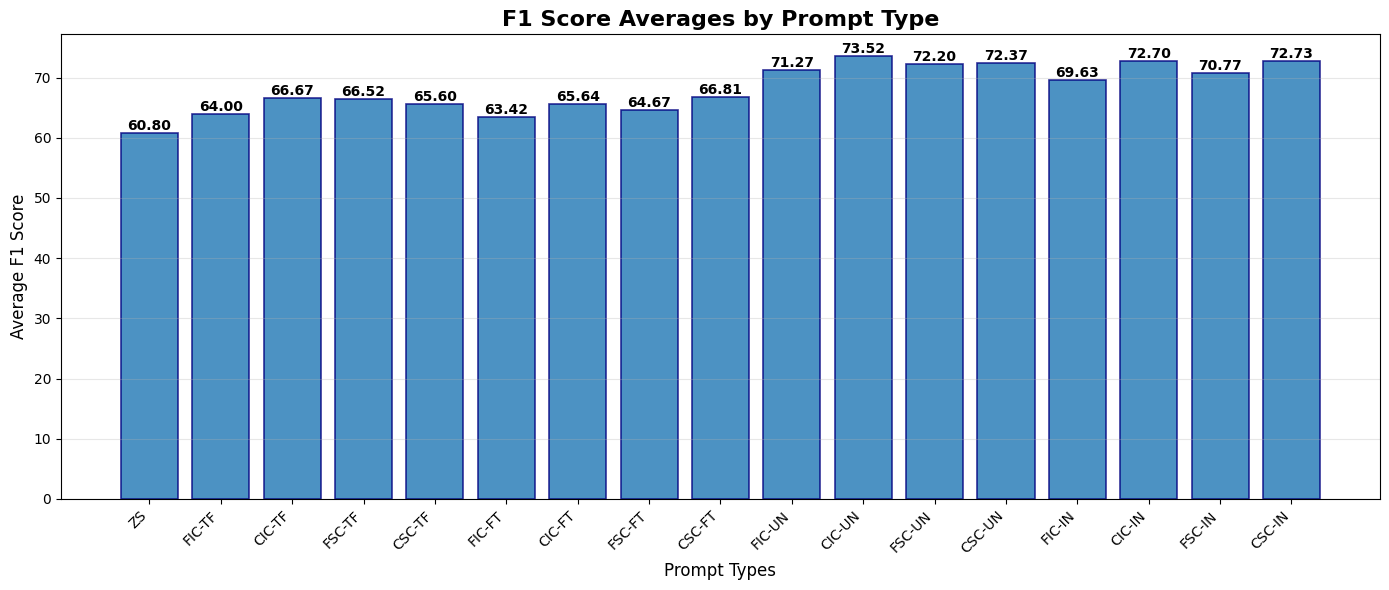

In [28]:

candidate_pairs = 'standard_blocking'
results_extraction_main(candidate_pairs, '')


# Clustering with Standard Blocking and weights of Meta-blocking

Datset D2 table & figure


Prompt Types,Average F1
ZS,82.810005
FIC-TF,84.154743
CIC-TF,83.846971
FSC-TF,84.099313
CSC-TF,81.457314
FIC-FT,83.440171
CIC-FT,82.994652
FSC-FT,82.460874
CSC-FT,82.156334
FIC-UN,91.220068


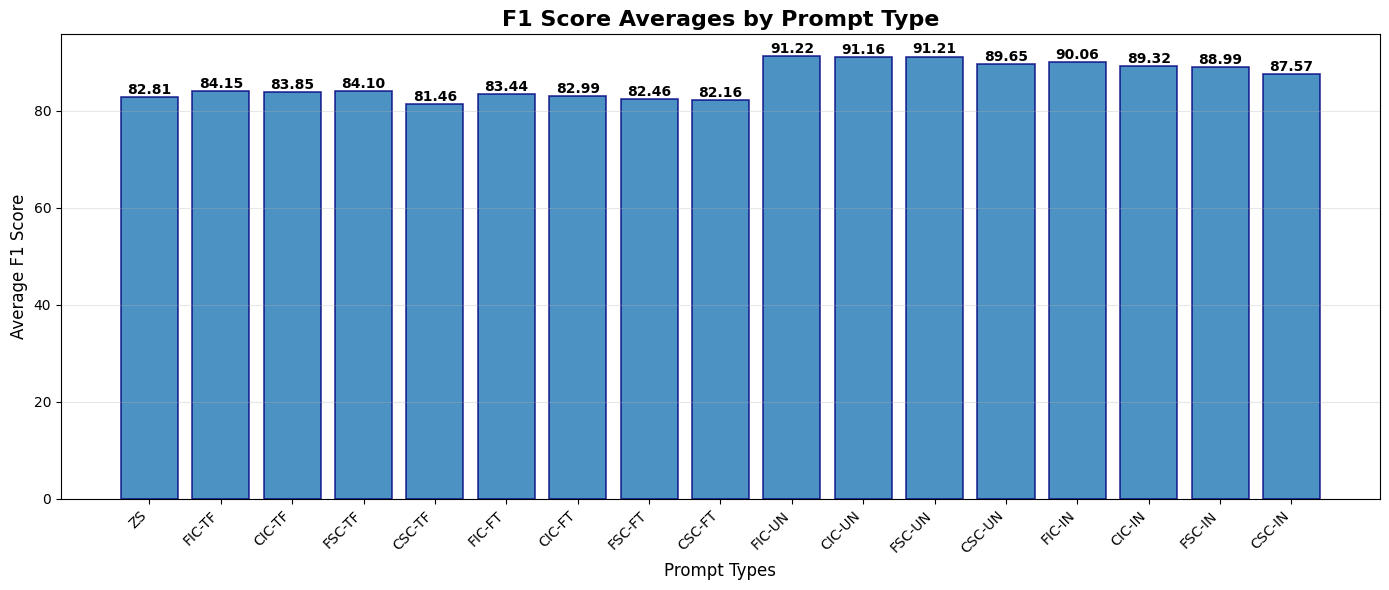

Datset D5 table & figure


Prompt Types,Average F1
ZS,78.461538
FIC-TF,71.314286
CIC-TF,82.262211
FSC-TF,85.557221
CSC-TF,83.076132
FIC-FT,68.657599
CIC-FT,76.749311
FSC-FT,84.946782
CSC-FT,84.307221
FIC-UN,74.903931


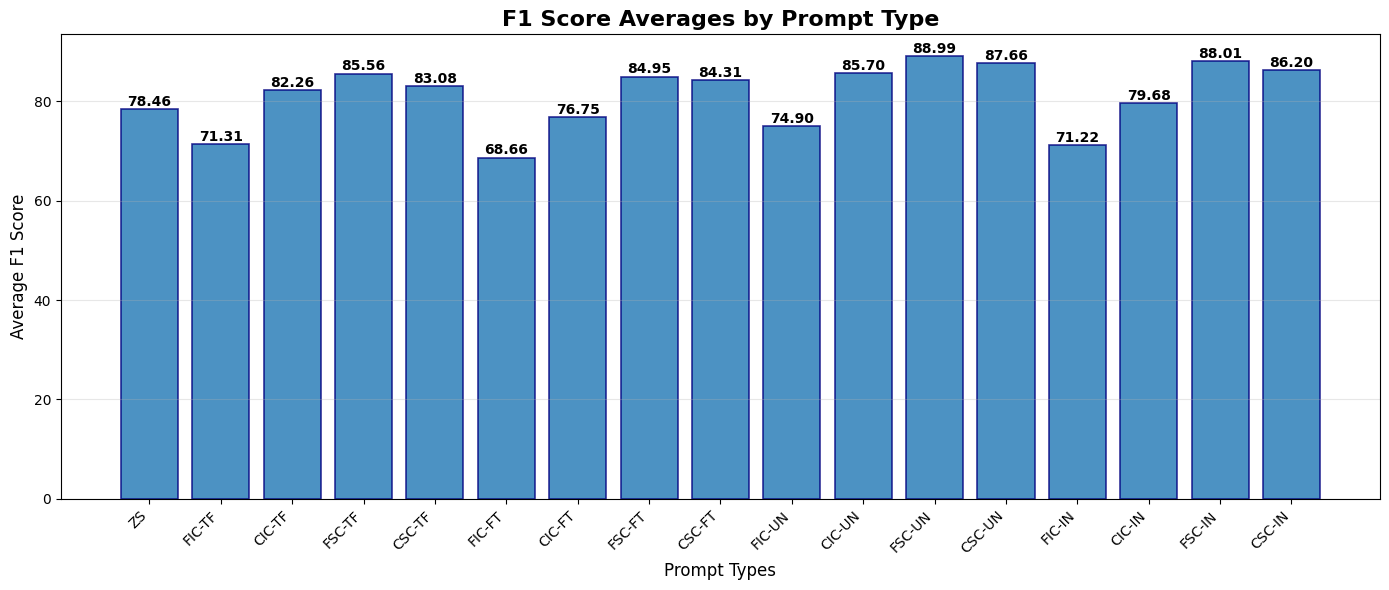

Datset D6 table & figure


Prompt Types,Average F1
ZS,70.446901
FIC-TF,68.145957
CIC-TF,64.981949
FSC-TF,59.311087
CSC-TF,60.399784
FIC-FT,67.439516
CIC-FT,66.935891
FSC-FT,63.522013
CSC-FT,68.460389
FIC-UN,72.072072


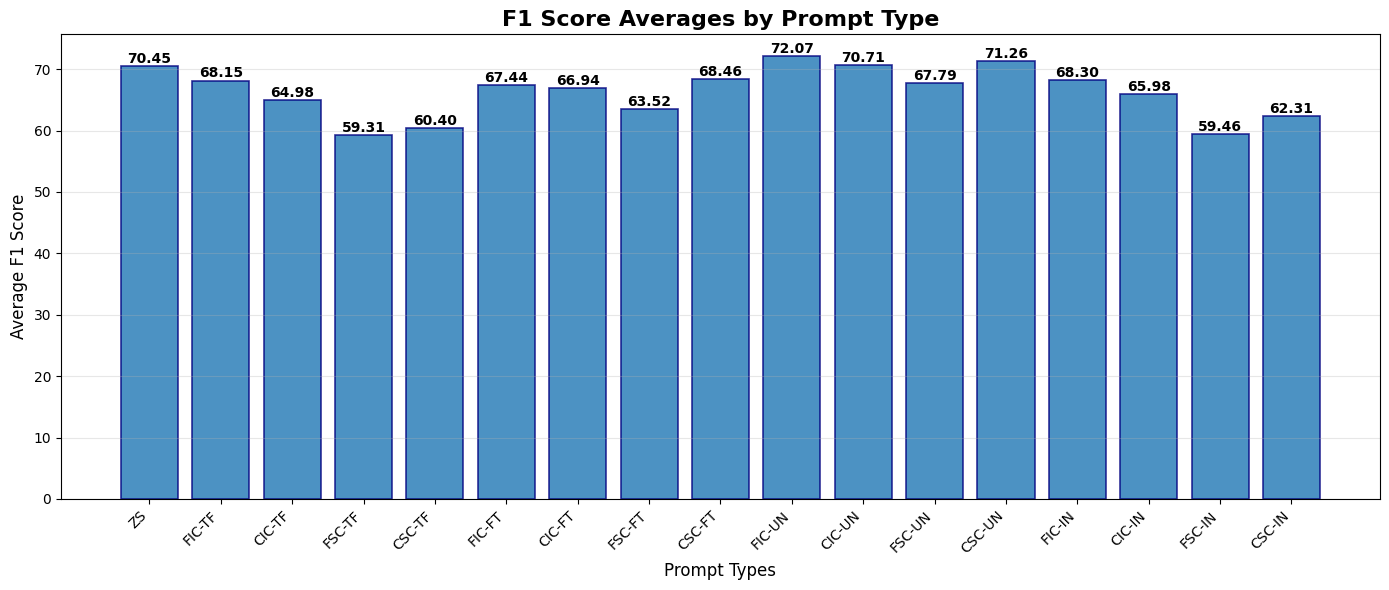

Datset D7 table & figure


Prompt Types,Average F1
ZS,60.441549
FIC-TF,65.198238
CIC-TF,64.055132
FSC-TF,63.028551
CSC-TF,64.845173
FIC-FT,64.742419
CIC-FT,64.361121
FSC-FT,64.174229
CSC-FT,64.556041
FIC-UN,66.395263


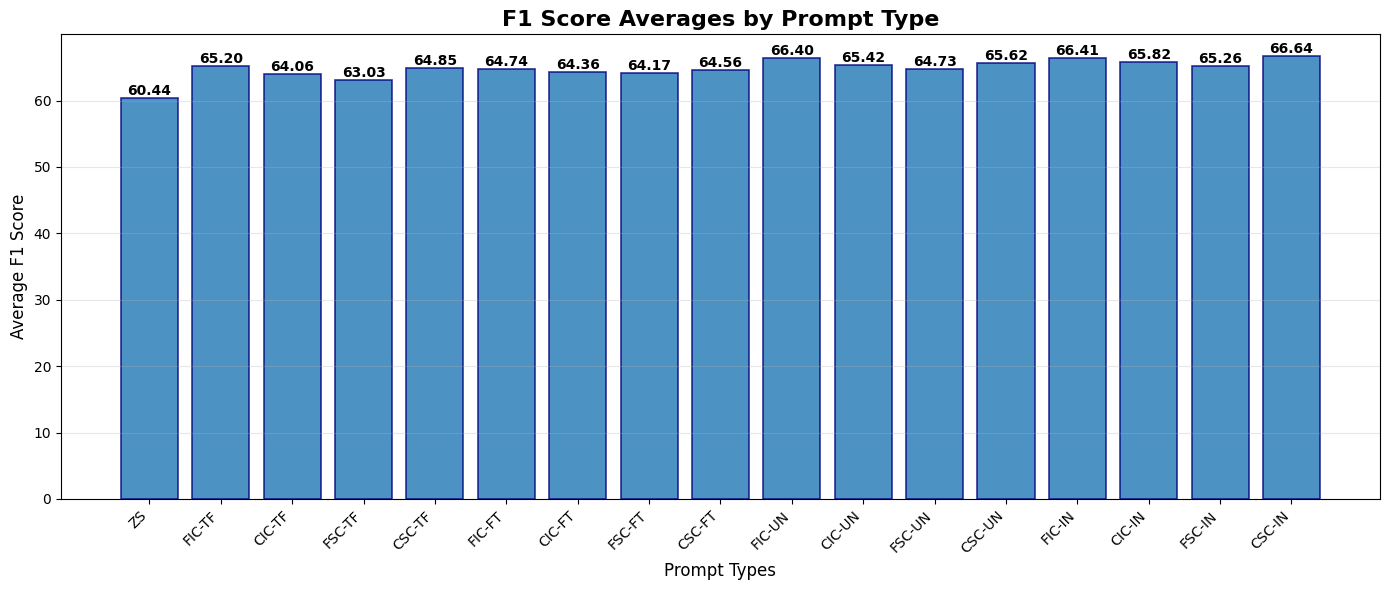

Datset D8 table & figure


Prompt Types,Average F1
ZS,64.179104
FIC-TF,66.295884
CIC-TF,68.451025
FSC-TF,67.451442
CSC-TF,67.299107
FIC-FT,64.281455
CIC-FT,67.425968
FSC-FT,65.871122
CSC-FT,68.114286
FIC-UN,70.329670


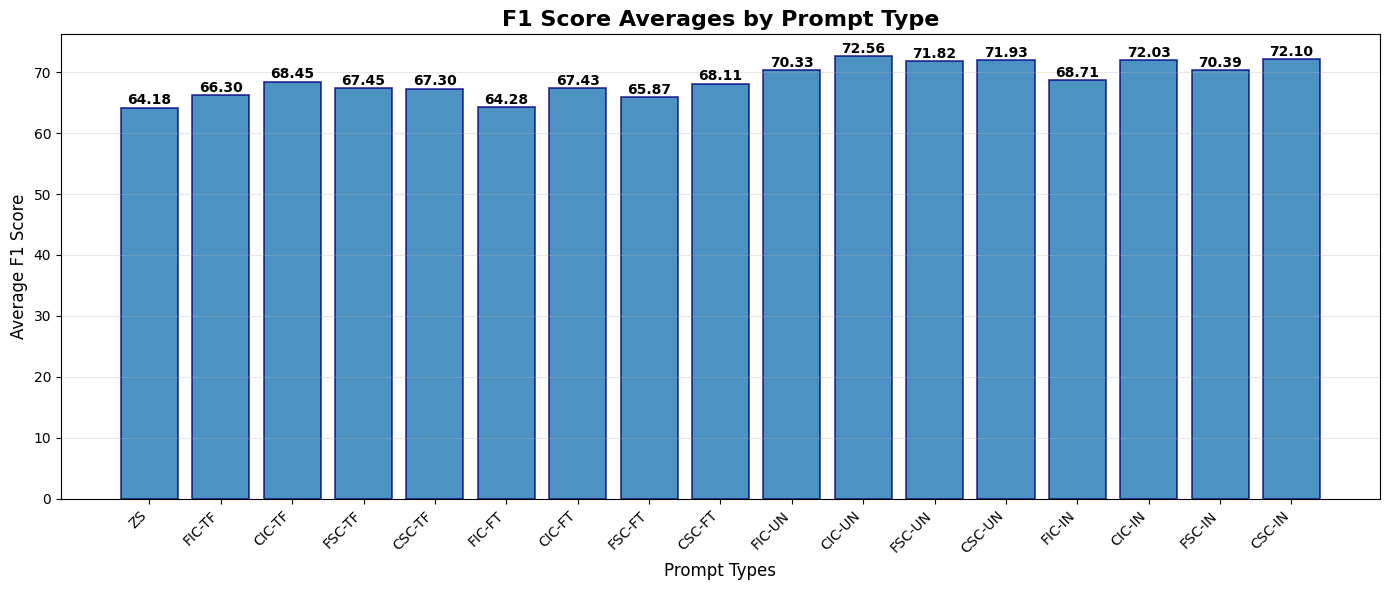

In [29]:
results_extraction_main(candidate_pairs, '_clustering', 'MetaBlocking-Method')


# Clustering with Standard Blocking and weights of SBERT

Datset D2 table & figure


Prompt Types,Average F1
ZS,84.970791
FIC-TF,85.198939
CIC-TF,84.864578
FSC-TF,85.079365
CSC-TF,82.544861
FIC-FT,84.738527
CIC-FT,84.216158
FSC-FT,83.432272
CSC-FT,83.450135
FIC-UN,92.657940


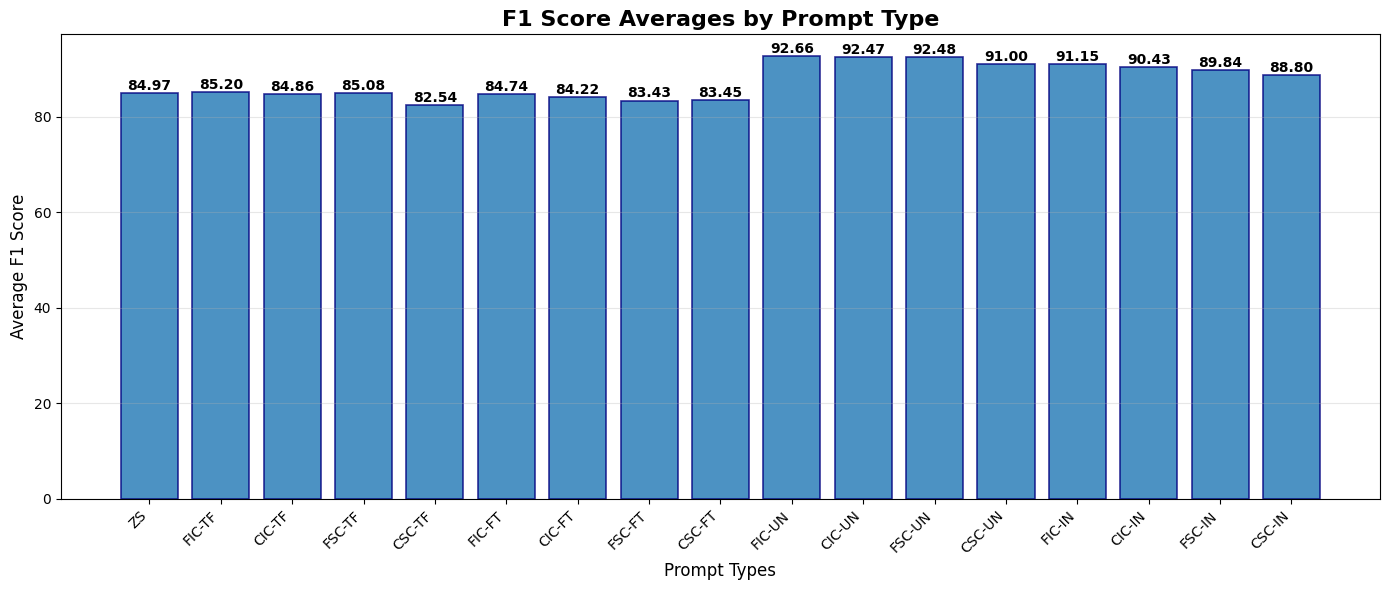

Datset D5 table & figure


Prompt Types,Average F1
ZS,78.404775
FIC-TF,71.735345
CIC-TF,82.460733
FSC-TF,85.176710
CSC-TF,83.333333
FIC-FT,68.245877
CIC-FT,76.807145
FSC-FT,84.722222
CSC-FT,84.379865
FIC-UN,75.060386


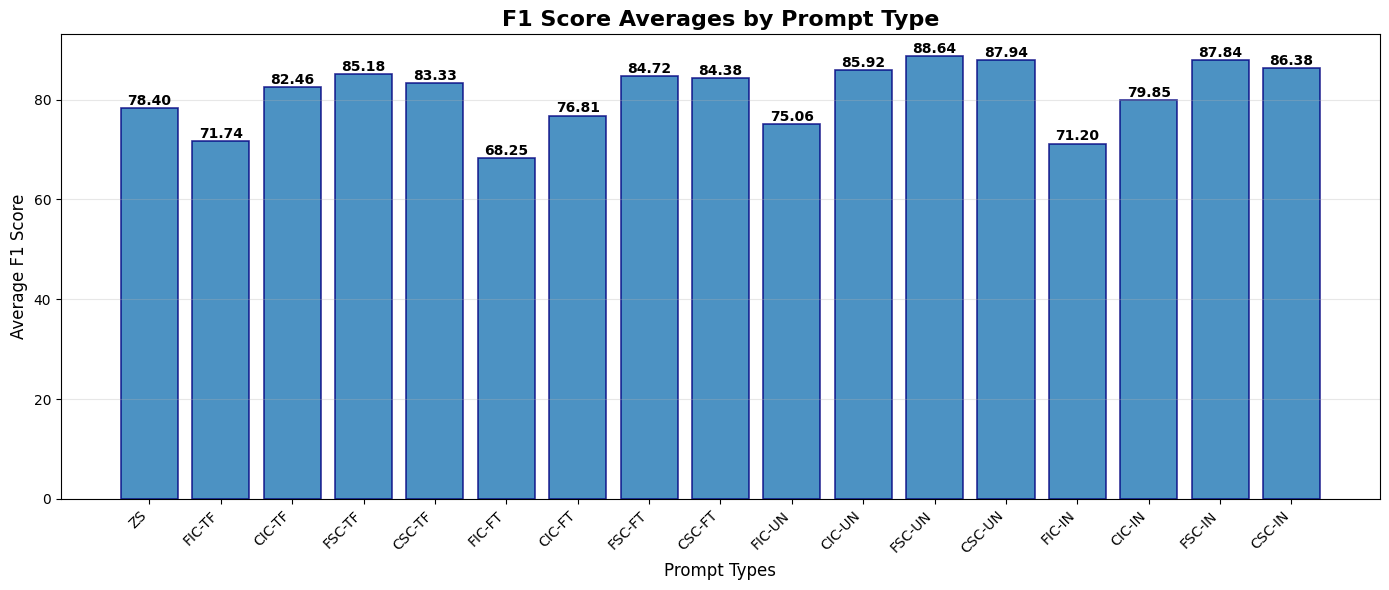

Datset D6 table & figure


Prompt Types,Average F1
ZS,73.491592
FIC-TF,71.095335
CIC-TF,67.230444
FSC-TF,63.025669
CSC-TF,64.628821
FIC-FT,69.569725
CIC-FT,69.294606
FSC-FT,66.702298
CSC-FT,71.552163
FIC-UN,74.586777


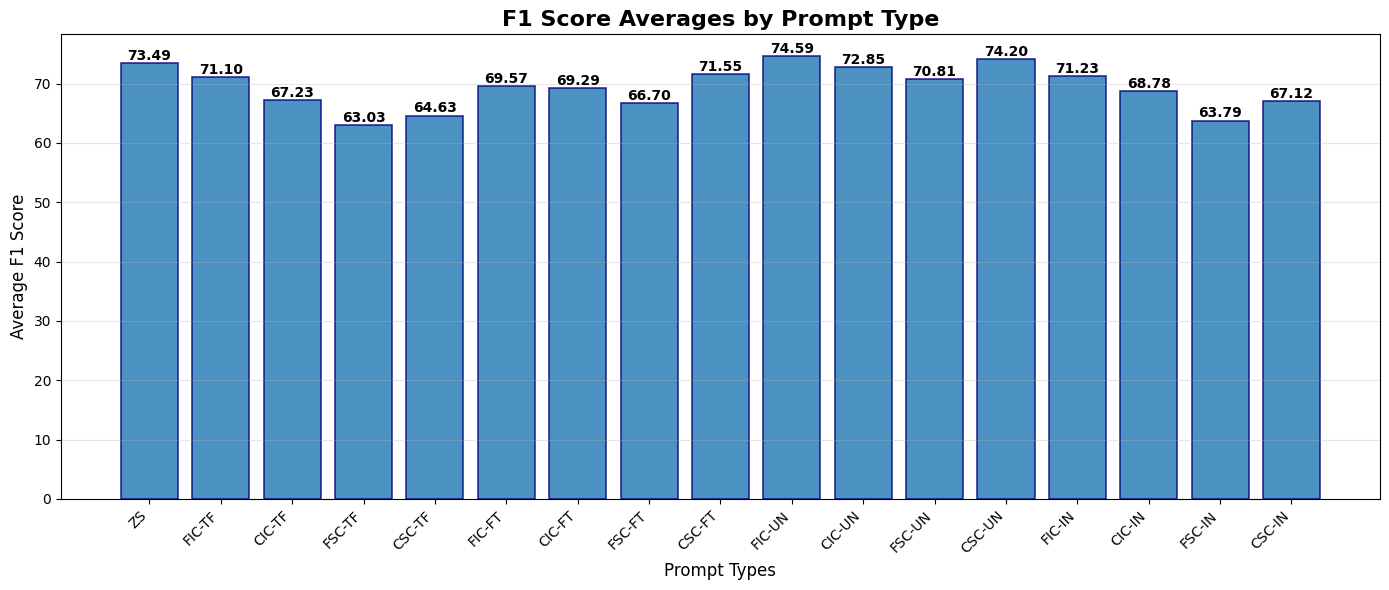

Datset D7 table & figure


Prompt Types,Average F1
ZS,68.289139
FIC-TF,68.983364
CIC-TF,68.565170
FSC-TF,68.509091
CSC-TF,69.253294
FIC-FT,68.947756
CIC-FT,68.745415
FSC-FT,68.444120
CSC-FT,68.932749
FIC-UN,70.464768


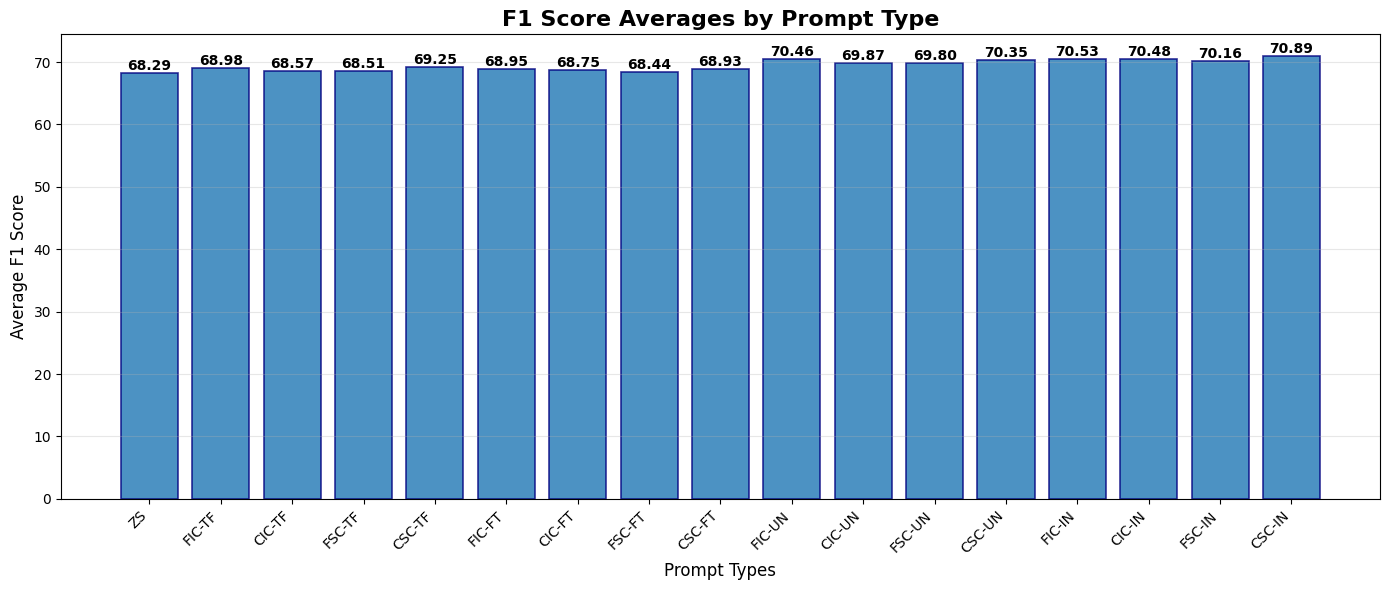

Datset D8 table & figure


Prompt Types,Average F1
ZS,66.381614
FIC-TF,68.082728
CIC-TF,70.245574
FSC-TF,68.122786
CSC-TF,68.529905
FIC-FT,65.948534
CIC-FT,68.685714
FSC-FT,66.586970
CSC-FT,68.843070
FIC-UN,72.218987


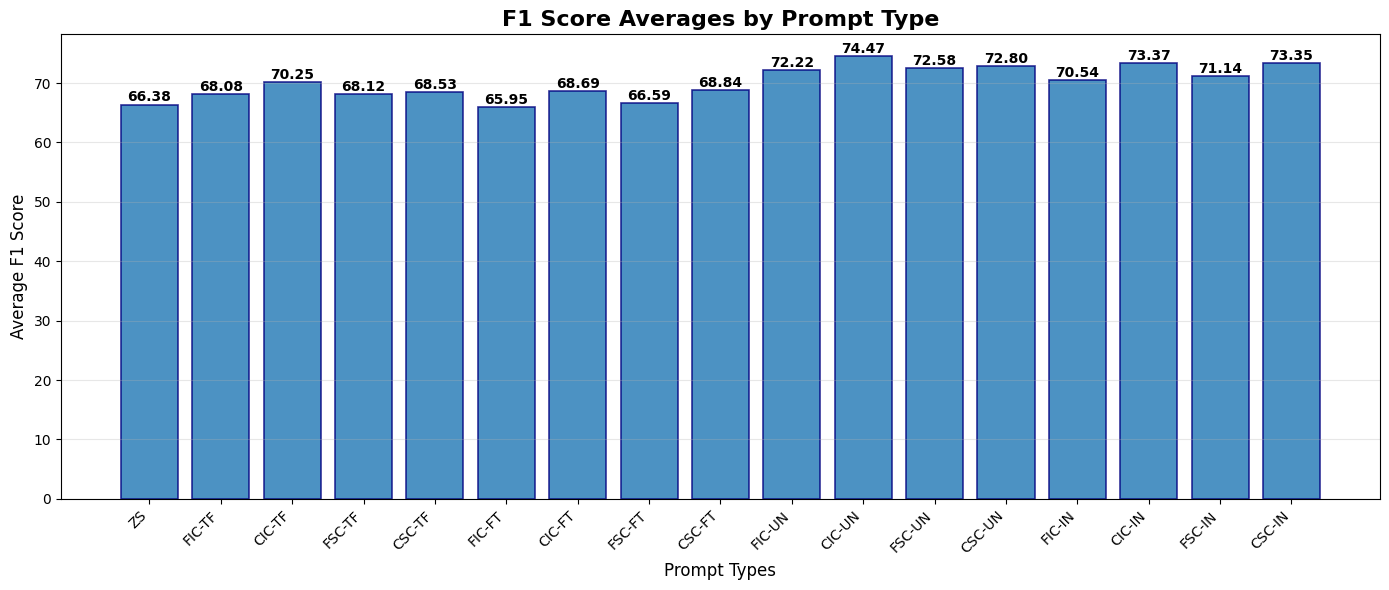

In [30]:
results_extraction_main(candidate_pairs, '_clustering', 'distilroberta')
